<a href="https://colab.research.google.com/github/GOPIKAV77/Python/blob/main/roc_curve_classification_report_shippingSales_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CONFUSION MATRIX, CLASSIFICATION REPORT AND AUC CURVE FOR SALES DATASET**

In [28]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("sales.csv",encoding='latin1')

In [4]:
df.head(7)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,...,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small


According to the Quantity ordered, price each whether it is shipped or not

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [6]:
df.isna().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [45]:
df = df.drop("ADDRESSLINE2",axis =1)

In [56]:
df1 = df.copy()
df1.dropna(axis=0, inplace = True)
df1.head(2)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
10,10223,37,100.00,1,3965.66,2/20/2004 0:00,Shipped,1,2,2004,...,03 9520 4555,636 St Kilda Road,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium
21,10361,20,72.55,13,1451.00,12/17/2004 0:00,Shipped,4,12,2004,...,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Small


In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 10 to 2808
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       263 non-null    int64  
 1   QUANTITYORDERED   263 non-null    int64  
 2   PRICEEACH         263 non-null    float64
 3   ORDERLINENUMBER   263 non-null    int64  
 4   SALES             263 non-null    float64
 5   ORDERDATE         263 non-null    object 
 6   STATUS            263 non-null    object 
 7   QTR_ID            263 non-null    int64  
 8   MONTH_ID          263 non-null    int64  
 9   YEAR_ID           263 non-null    int64  
 10  PRODUCTLINE       263 non-null    object 
 11  MSRP              263 non-null    int64  
 12  PRODUCTCODE       263 non-null    object 
 13  CUSTOMERNAME      263 non-null    object 
 14  PHONE             263 non-null    object 
 15  ADDRESSLINE1      263 non-null    object 
 16  CITY              263 non-null    object 
 17  

In [58]:
df1["STATUS"].unique()

array(['Shipped', 'In Process', 'Disputed'], dtype=object)

In [59]:
df1["STATUS"] = df1["STATUS"].apply(lambda x: 1 if x == "Shipped" else 0)

In [60]:
df1["STATUS"].unique()

array([1, 0])

In [61]:
df1["STATUS"].value_counts()

,count
STATUS,
1,245
0,18


In [62]:
x = df1[["QUANTITYORDERED","PRICEEACH"]]
y = df1["STATUS"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=0)

In [63]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [64]:
y_predict_test = model.predict(x_test)
y_predict_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [65]:
y_predict_train = model.predict(x_train)
y_predict_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [66]:
y_test_proba = model.predict_proba(x_test)[:,1]
y_test_proba

array([0.84271458, 0.97672816, 0.87603315, 0.97902833, 0.97603049,
       0.97711099, 0.94718246, 0.94783975, 0.94365727, 0.86130136,
       0.96549038, 0.95930105, 0.97757831, 0.89942078, 0.97762627,
       0.91745641, 0.98038646, 0.95049866, 0.97746335, 0.96866486,
       0.95424704, 0.94365727, 0.95654758, 0.96794242, 0.92561286,
       0.97590641, 0.9699097 , 0.97073597, 0.86032716, 0.91116751,
       0.90824889, 0.97719784, 0.9114262 , 0.95855048, 0.96873091,
       0.96141604, 0.98165829, 0.93138596, 0.97261609, 0.96873091,
       0.87841763, 0.97180184, 0.9665932 , 0.9250846 , 0.90545715,
       0.90649761, 0.93991173, 0.97437861, 0.93103242, 0.95685662,
       0.98096507, 0.96327312, 0.98151557])

In [67]:
y_train_proba = model.predict_proba(x_train)[:,1]
y_train_proba

array([0.98105181, 0.96431473, 0.91213127, 0.97261609, 0.91038113,
       0.86670736, 0.95361684, 0.90340765, 0.97757831, 0.95672298,
       0.88761281, 0.74395074, 0.98038646, 0.95930105, 0.93450018,
       0.96540513, 0.96448381, 0.97749216, 0.97061247, 0.87660434,
       0.81069525, 0.93707962, 0.97908255, 0.9665932 , 0.97902833,
       0.91185282, 0.88061355, 0.97338414, 0.92995747, 0.95620189,
       0.96175066, 0.88877176, 0.97437861, 0.96883019, 0.98165829,
       0.98038646, 0.93696767, 0.8782681 , 0.96431473, 0.97995767,
       0.97073597, 0.91213127, 0.88761281, 0.97757831, 0.97902833,
       0.90649761, 0.97503621, 0.90292392, 0.96188699, 0.8732393 ,
       0.92248624, 0.95361684, 0.97432945, 0.97437861, 0.9054391 ,
       0.80436126, 0.94365727, 0.95361684, 0.96188699, 0.97603049,
       0.90649761, 0.98165829, 0.97832694, 0.98038646, 0.90054213,
       0.95654758, 0.97261609, 0.95359703, 0.95735699, 0.96339431,
       0.92152429, 0.95654758, 0.96116982, 0.90154227, 0.93171

**SUMMARY FOR LOGISTIC REGRESSION**

In [68]:
import statsmodels.api as sm
x1 = sm.add_constant(x)
logit = sm.Logit(y,x1)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.239218
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 STATUS   No. Observations:                  263
Model:                          Logit   Df Residuals:                      260
Method:                           MLE   Df Model:                            2
Date:                Sat, 01 Mar 2025   Pseudo R-squ.:                 0.04155
Time:                        09:57:29   Log-Likelihood:                -62.914
converged:                       True   LL-Null:                       -65.642
Covariance Type:            nonrobust   LLR p-value:                   0.06539
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.1107      1.305      2.384      0.017       0.553       5.668
QUANTITYORDERED    -0.0475      0.024     -1.969      0.049      -0.095      -0.000
PRICEEACH           0.0151      0.012      1.288      0.198      -0.008       0.038
===================================================================================
"""

**ACCURACY SCORE**

In [69]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_predict_test)
acc_score

0.9056603773584906

**CONFUSION MATRIX**

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)
cm

array([[ 0,  5],
       [ 0, 48]])

**CLASSIFICATION REPORT**

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.91      1.00      0.95        48

    accuracy                           0.91        53
   macro avg       0.45      0.50      0.48        53
weighted avg       0.82      0.91      0.86        53



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**ROC CURVE FOR TRAIN DATASET**

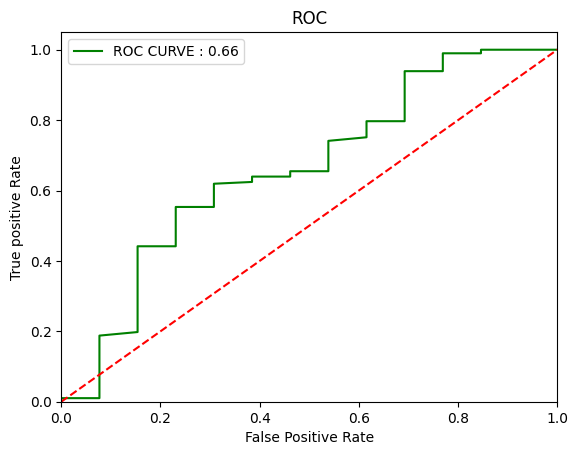

In [80]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
ROC_CURVE = roc_auc_score(y_train, y_predict_train)
f1, f2 , threshold = roc_curve(y_train, y_train_proba)
roc_1 = auc(f1,f2)

plt.figure()
plt.plot(f1,f2, color="green",label="ROC CURVE : %0.2f"%roc_1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True positive Rate")
plt.title("ROC")
plt.legend(loc="upper left")
plt.show()